In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Fifth-force limits

Try to reproduce the fifth-force limits in the light dark matter paper.

In [20]:
fifth_force_lim = np.genfromtxt('./fifth_force_lim_yn.csv', delimiter=',').T
sidm_yx_lim     = np.genfromtxt('./sidm_yx_lim.csv', delimiter=',').T

sidm_yx_lim[0]  = sidm_yx_lim[0] * 1e6  # Convert MeV to eV

Text(0, 0.5, '$y_\\chi$')

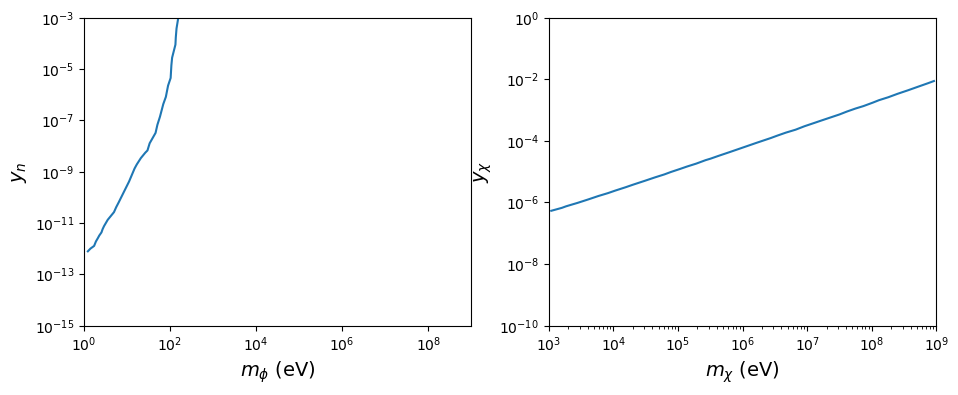

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

ax[0].loglog(fifth_force_lim[0], fifth_force_lim[1])
ax[0].set_ylim(1e-15, 1e-3)
ax[0].set_xlim(1, 1e9)

ax[0].set_xlabel('$m_\phi$ (eV)', fontsize=14)
ax[0].set_ylabel('$y_n$', fontsize=14)

ax[1].loglog(sidm_yx_lim[0], sidm_yx_lim[1])
ax[1].set_ylim(1e-10, 1)
ax[1].set_xlim(1e3, 1e9)

ax[1].set_xlabel('$m_\chi$ (eV)', fontsize=14)
ax[1].set_ylabel('$y_\chi$', fontsize=14)

In [100]:
convert_factor = 0.3894e-27 / 1e-18  # 1 / eV^2 -> cm^2
mn_ev = 939565346 # neutron mass, eV

def get_fifth_force_sigma_n(mx, mphi, yx_lim='SIDM'):
    # Input mx in eV (array-like)
    
    yn   = np.interp(mphi, fifth_force_lim[0], fifth_force_lim[1])
    
    if yx_lim == 'SIDM':
        yx = np.interp(mx, sidm_yx_lim[0], sidm_yx_lim[1])
    elif yx_lim == 'unity':
        yx = 1
    
    mu_xn = mx * mn_ev / (mx + mn_ev)

    # Cross section in cm^2
    sig_n = convert_factor * yn**2 * yx**2 * mu_xn**2 / (4 * np.pi * (mphi**2 + (1e-3 * mx)**2)**2)
    
    return sig_n

Text(0.5, 1.0, '$m_\\phi = 10^{-3} \\ m_\\chi$, $y_\\chi$ = SIDM')

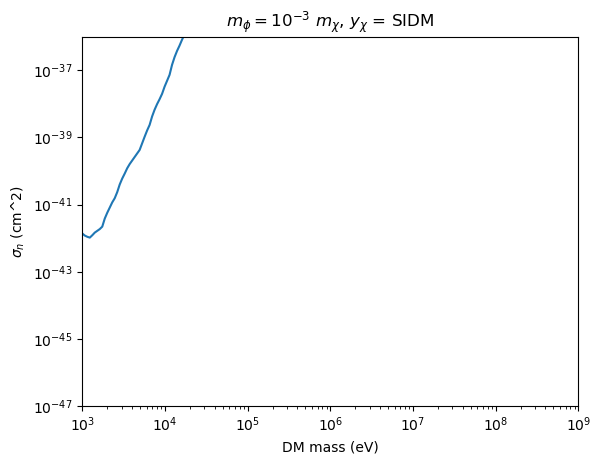

In [101]:
mx = np.logspace(3, 9, 200)
mphi = 1e-3 * mx

sig_n_fifth_force = get_fifth_force_sigma_n(mx, mphi, 'SIDM')

plt.loglog(mx, sig_n_fifth_force)
plt.xlim(1e3, 1e9)
plt.ylim(1e-47, 1e-36)

plt.xlabel('DM mass (eV)')
plt.ylabel('$\sigma_n$ (cm^2)')
plt.title('$m_\phi = 10^{-3} \ m_\chi$, $y_\chi$ = SIDM')

This is incorrect because m_phi is not correctly extrapolated to lower values -- however fifth force experiemnts including torsion balance give approximately flat constraints at micron scale. 

Text(0.5, 1.0, '$m_\\phi$ = 10 eV, $y_\\chi = 1$')

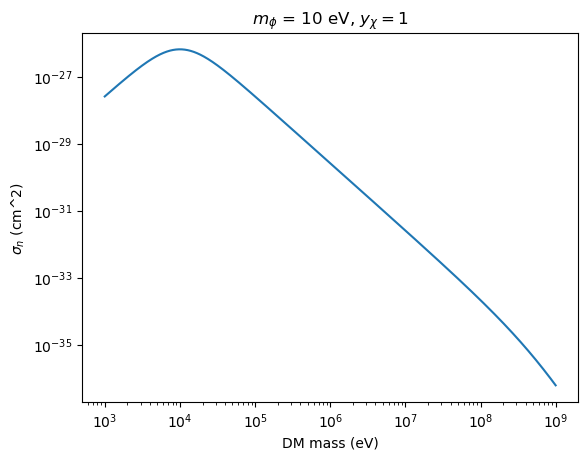

In [103]:
mx = np.logspace(3, 9, 2000)

sig_n_fifth_force = get_fifth_force_sigma_n(mx, 10, 'unity')

plt.loglog(mx, sig_n_fifth_force)

plt.xlabel('DM mass (eV)')
plt.ylabel('$\sigma_n$ (cm^2)')
plt.title('$m_\phi$ = 10 eV, $y_\chi = 1$')

##  25 keV threshold, 1 nanosphere-month

In [104]:
alpha_file = np.load('alpha_n_25kev_1spheremonth.npz', allow_pickle='True')

mediator_mass = alpha_file['mediator_mass_ev']
mx_gev = alpha_file['mx_gev']
alpha_lim = alpha_file['alpha_n_lim']

Text(0, 0.5, 'Single neutron coupling $\\alpha_n$')

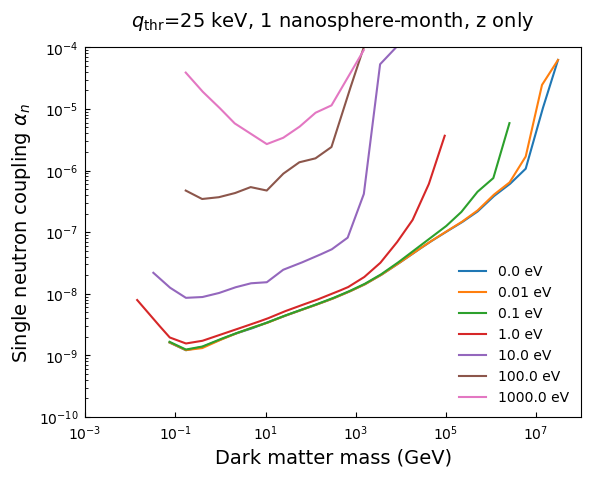

In [105]:
fig, ax = plt.subplots()

for i, lim in enumerate(alpha_lim):
    ax.loglog(mx_gev[i], lim, label=f'{mediator_mass[i]} eV')

ax.set_ylim(1e-10, 1e-4)
ax.set_xlim(1e-3, 1e8)
ax.tick_params(axis='both', which='both', direction="in", pad=5)

ax.set_title(r'$q_{\mathrm{thr}}$=25 keV, 1 nanosphere-month, z only', fontsize=14, pad=15)
ax.legend(frameon=False, fontsize=10)
ax.set_xlabel('Dark matter mass (GeV)', fontsize=14)
ax.set_ylabel(r'Single neutron coupling $\alpha_n$', fontsize=14)

### Scalar mediator / nucleon coupling

To be specific, let's consider a scalar mediator coupled to nucleons in the effective Lagrangian
$$
  \mathcal{L} \subset - \frac{1}{2} y_\chi m_\chi \phi \chi^2 - y_n \phi \bar{n} n,
$$
**bearing in mind that force is attractive so our calculation is not technically correct.**

Convert limits on single neutron coupling to single *neucleon* coupling, let's call it $y_n$. Taking the $4 \pi$ in the Yukawa potential into account as well, we have

$$
  y_n = \frac{4 \pi \cdot \alpha_n}{2} = 2 \pi \cdot \alpha_n,
$$
where $\alpha_n$ is the single neutron coupling in the exclusion plot above and $y_n$ is the effective nucleon coupling in the Lagrangian.

In [106]:
y_n_limit = alpha_lim * 4 * np.pi / 2

Text(0, 0.5, 'Effective neucleon coupling $y_n$')

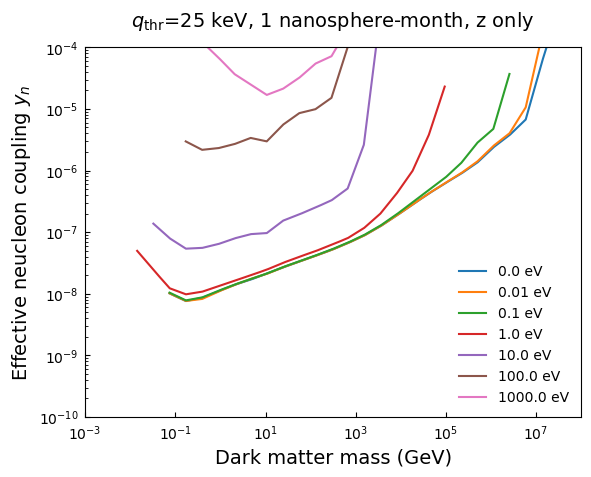

In [116]:
fig, ax = plt.subplots()

for i, lim in enumerate(y_n_limit):
    ax.loglog(mx_gev[i], lim, label=f'{mediator_mass[i]} eV')

ax.set_ylim(1e-10, 1e-4)
ax.set_xlim(1e-3, 1e8)
ax.tick_params(axis='both', which='both', direction="in", pad=5)

ax.set_title(r'$q_{\mathrm{thr}}$=25 keV, 1 nanosphere-month, z only', fontsize=14, pad=15)
ax.legend(frameon=False, fontsize=10)
ax.set_xlabel('Dark matter mass (GeV)', fontsize=14)
ax.set_ylabel(r'Effective neucleon coupling $y_n$', fontsize=14)

### Cross section

We will parametrize the direct detection cross section as
$$
    \sigma_n = \frac{y_n^2 y_\chi^2}{4 \pi} \frac{\mu_{\chi n}^2}{(m^2_\phi + v^2_{\text{DM}} m^2_\chi)^2}.
$$
There are astrophysical constraints on $y_\chi$ based on DM self-interaction so we can either choose it to be saturating the bound or just set $y_\chi$ to 1 when the bounds don't apply.

Here $\mu_{\chi n}$ is the DM-nucleon reduced mass, $v_{\text{DM}} m_\chi$ is the reference momentum transfer with $v_{\text{DM}} = 10^{-3}$.

In the composite DM paper the reference momentum transfer is $v_{\text{DM}} m_n$ where $m_n$ is the neutron mass - be careful about the parametrization.

*First try -* Let's just set $y_\chi = 1$ with fixed mediator mass and see what the constraints look like.

In [ ]:
# Interpolate the y_n limit in m_x and m_phi


In [109]:
convert_factor = 0.3894e-27 / 1e-18  # 1 / eV^2 -> cm^2

mn_ev = 949e6        # neutron mass, eV
mx_ev = mx_gev * 1e9 # DM mass, eV
v_dm = 1e-3

def get_sphere_sigma_n(mx, mphi, yx_lim='unity'):
    
    
    
    sig_n = np.empty_like(mx)
    sig_n[] = np.nan
    
    pass

In [112]:
mx_ev.min()

14251026.703029977

In [13]:
convert_factor = 0.3894e-27 / 1e-18  # 1 / eV^2 -> cm^2

mn_ev = 949e6        # neutron mass, eV
mx_ev = mx_gev * 1e9 # DM mass, eV
v_dm = 1e-3

# DM-nucleon reduced mass, eV
mu_chi_n = mx_ev * mn_ev / (mx_ev + mn_ev)

# Mediator mass, eV
m_phi = mediator_mass

sigma_n = np.empty_like(y_n_limit)
for i, mphi in enumerate(m_phi):
    sigma_n[i] = convert_factor * ( y_n_limit[i]**2 * mu_chi_n[i]**2 ) / ( 4 * np.pi * (mphi**2 + (v_dm * mx_ev[i])**2)**2 )
    

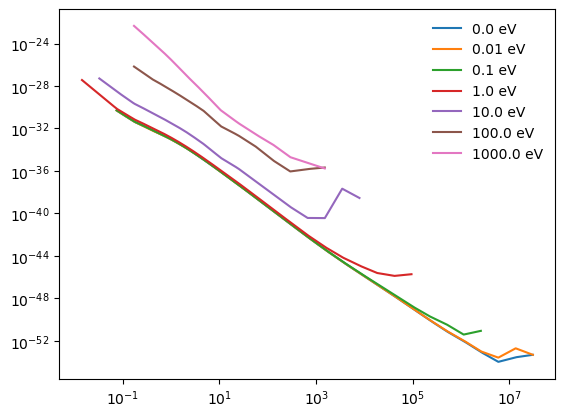

In [14]:
fig, ax = plt.subplots()

for i, sigma in enumerate(sigma_n):
    ax.loglog(mx_gev[i], sigma, label=f'{mediator_mass[i]} eV')
    
ax.legend(frameon=False, fontsize=10)

In [8]:
4 * np.pi * 1e-12 * 

SyntaxError: invalid syntax (4205927250.py, line 1)